In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import linregress

In [2]:
#IMPORT DATA
data = pd.read_csv("C:/Users/Laura McPhillips/Downloads/mydatastaml.csv")

In [3]:
#TIDY DATA
df = data[["Country/Territory", "Region", "Edition", "Status", "PR Rating", "CL Rating", "A", "B", "C", "D", "E", "F", "G", "Total"]]
df = df[["Country/Territory", "Edition", "Total", "Region"]]
df = df[(df["Edition"] >= 2008) & (df["Region"] == "Europe")]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop = True)
df

,Country/Territory,Edition,Total,Region
2,Albania,2022,67,Europe
4,Andorra,2022,93,Europe
10,Austria,2022,93,Europe
17,Belgium,2022,96,Europe
22,Bosnia and Herzegovina,2022,53,Europe
...,...,...,...,...
3096,Spain,2008,96,Europe
3104,Sweden,2008,100,Europe
3105,Switzerland,2008,97,Europe
3119,Turkey,2008,66,Europe


In [4]:
# Calculate Correlation and p-value 

def function(x,y):
    res = linregress(x,y)
    r = res.rvalue
    p = res.pvalue.round(5)
    return r,p

grouped = pd.DataFrame(df.groupby('Country/Territory').apply(lambda x: function(x['Edition'], x['Total']))).unstack().reset_index()
d = pd.DataFrame(grouped['Country/Territory'])
d['R Val'], d['P Val'] = zip(*grouped[0])    

new_df = df.merge(d)
new_df = new_df[['Country/Territory','R Val', 'P Val']]
new_df.reset_index(drop = True)


,Country/Territory,R Val,P Val
0,Albania,0.564606,0.02832
1,Albania,0.564606,0.02832
2,Albania,0.564606,0.02832
3,Albania,0.564606,0.02832
4,Albania,0.564606,0.02832
...,...,...,...
640,Macedonia,-0.520086,0.08304
641,Macedonia,-0.520086,0.08304
642,Macedonia,-0.520086,0.08304
643,Macedonia,-0.520086,0.08304


In [5]:
#Classify Trend

def replacing(x,y):
        if x <= -0.4 and y < 0.05:
            return 'Decrease'
        elif x >= 0.4 and y < 0.05:
            return 'Increase'
        else:
            return 'Non-Linear'
    
       
new_df['Trend'] = new_df[['R Val','P Val']].apply(lambda x: replacing(*x), axis = 1)

#Print duplicate removed version
rem_dup = new_df.drop_duplicates().reset_index(drop=True)
rem_dup['Trend'].value_counts()
rem_dup

,Country/Territory,R Val,P Val,Trend
0,Albania,0.564606,0.02832,Increase
1,Andorra,-0.810325,0.00025,Decrease
2,Austria,-0.971390,0.00000,Decrease
3,Belgium,-0.715310,0.00272,Decrease
4,Bosnia and Herzegovina,-0.921728,0.00000,Decrease
5,Bulgaria,-0.768818,0.00081,Decrease
6,Croatia,0.000000,1.00000,Non-Linear
7,Cyprus,-0.259931,0.34948,Non-Linear
8,Czech Republic,-0.862449,0.00004,Decrease
9,Denmark,-0.181142,0.51823,Non-Linear


In [6]:
#Insignificant Trends
def replacing2(x,y):
    if x <= -0.4 and y > 0.05:
        return 'Insig Dec'
    elif x >= 0.4 and y > 0.05:
        return 'Insig Inc'
    else:
        return "None"
    
df2 = new_df.copy()      
df2['Insig_Trend'] = df2[['R Val','P Val']].apply(lambda x: replacing2(*x), axis = 1)

#Print duplicate removed version
df_insig = df2.drop_duplicates().reset_index(drop=True)
df_insig.drop(df_insig[df_insig.Insig_Trend == "None"].index)

,Country/Territory,R Val,P Val,Trend,Insig_Trend
20,Latvia,0.481812,0.06897,Non-Linear,Insig Inc
26,Montenegro,-0.420334,0.11876,Non-Linear,Insig Dec
27,Netherlands,-0.430498,0.10919,Non-Linear,Insig Dec
28,North Macedonia,0.960769,0.17891,Non-Linear,Insig Inc
29,Northern Cyprus,-0.407087,0.13207,Non-Linear,Insig Dec
43,Macedonia,-0.520086,0.08304,Non-Linear,Insig Dec


In [7]:
#Fit X and Y for Model
Y = new_df['Trend']
X = new_df.drop(columns = {'Country/Territory', 'Trend'})

#Fit train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
#Set classifier
clf = SVC(gamma=2, C=1)

#Fit classifier to train and test dataset
clf.fit(X_train, y_train)
predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

#Evaluate
print("Number of mislabeled points in the training set out of a total %d points : %d" % (X_train.shape[0], (y_train != predicted_y_train).sum()))
print("Number of mislabeled points in the testing set out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted_y_test).sum()))

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score: ', train_score, test_score)

Number of mislabeled points in the training set out of a total 516 points : 16
Number of mislabeled points in the testing set out of a total 129 points : 2
Score:  0.9689922480620154 0.9844961240310077


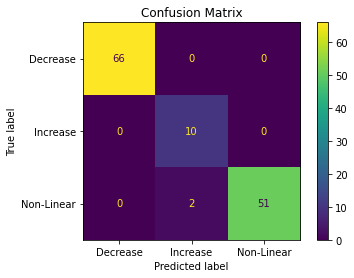

In [9]:
#Confusion Matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.title("Confusion Matrix")
plt.show()


In [10]:
#Cross Validation
scores = cross_val_score(clf, X, Y, cv=5)
print(np.mean(scores))

0.9720930232558139


C:\Users\Laura McPhillips\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Democracy in Hungary'}, xlabel='Edition', ylabel='Total'>

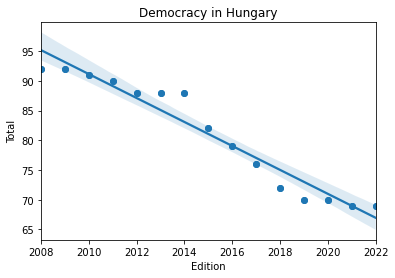

In [11]:
#Example Visualisations
data_vis = df[df["Country/Territory"] == "Hungary"]
year = data_vis["Edition"]
points = data_vis["Total"]
plt.scatter(year,points)
plt.title("Democracy in Hungary")

sns.regplot(year, points)

C:\Users\Laura McPhillips\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Democracy in Poland'}, xlabel='Edition', ylabel='Total'>

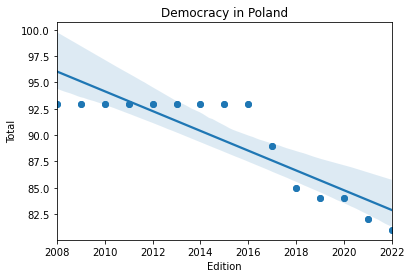

In [12]:
data_vis2 = df[df["Country/Territory"] == "Poland"]
year2 = data_vis2["Edition"]
points2 = data_vis2["Total"]
plt.scatter(year2,points2)
plt.title("Democracy in Poland")

sns.regplot(year2, points2)

C:\Users\Laura McPhillips\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Democracy in Albania'}, xlabel='Edition', ylabel='Total'>

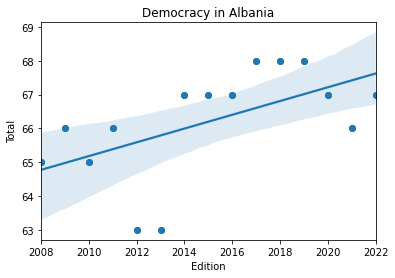

In [13]:
data_vis3 = df[df["Country/Territory"] == "Albania"]
year3 = data_vis3["Edition"]
points3 = data_vis3["Total"]
plt.scatter(year3,points3)
plt.title("Democracy in Albania")

sns.regplot(year3, points3)

C:\Users\Laura McPhillips\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Democracy in Italy'}, xlabel='Edition', ylabel='Total'>

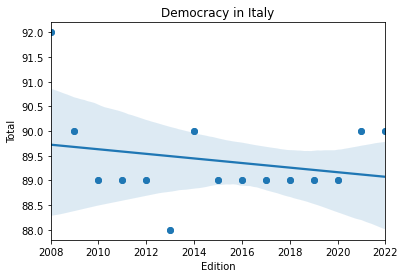

In [14]:
data_vis4 = df[df["Country/Territory"] == "Italy"]
year4 = data_vis4["Edition"]
points4 = data_vis4["Total"]
plt.scatter(year4,points4)
plt.title("Democracy in Italy")

sns.regplot(year4, points4)

In [15]:
data2 = pd.DataFrame(df.groupby('Country/Territory')[['Total','Edition']].corr()).i]
data2

SyntaxError: unmatched ']' (<ipython-input-15-49c1f824bcee>, line 1)